In [2]:
import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dia = csv.excel()
df = pd.read_csv("carretera4.csv")

NameError: name 'csv' is not defined

In [188]:
class HighwaySimulator:
	"""This class keeps track of the state of the world and is able to sense it"""
	MAXCRASHES=1000
	def __init__(self,world,grafica=True):
		self.world=world
		self.positionY=0
		self.positionX=random.randint(1,len(world.columns)-2)
		self.trayectoriaX=[self.positionX]
		self.trayectoriaY=[self.positionY]
		self.crashes=0
		self.steps=0
		self.out=False
		self.graficar=grafica
		#graficar
		if grafica:
			l=[(j,world.ix[i,j]*i) for i in range(len(world.index)) for j in range(len(world.columns)) ]
			l=zip(*l)
			plt.scatter(l[0],l[1])
		
	#returns the values (for now noiseless of the Moore neighborhood) from left to right, top to bottom 
	def sensor(self):
		output=[]
		positionY=self.positionY
		positionX=self.positionX
		world=self.world
		if positionY==0:
			output= output + [1,1,1] #behind limit
		else:
			output=output + [df.ix[positionY-1,positionX-1],df.ix[positionY-1,positionX],df.ix[positionY-1,positionX+1] ] #behind
		output=output + [df.ix[positionY,positionX-1],df.ix[positionY,positionX],df.ix[positionY,positionX+1] ] #sides
		if positionY==len(world.index)-1: #front boundary
			output= output + [1,1,1]
		else:
			output=output + [df.ix[positionY+1,positionX-1],df.ix[positionY+1,positionX],df.ix[positionY+1,positionX+1] ] #front
		return output
		
	###Set an arbitrary position
	def setPosition(self,x,y):
		world=self.world
		if x<=1:
			self.positionX=1
		else:
			if x >= len(world.columns) -2:
				self.positionX=len(world.columns) -2
			else:
				self.positionX=x
		
		if y<=0:
			self.positionY=0
		else:
			if y >= len(world.index) -1:
				self.positionY=len(world.index) -1
			else:
				self.positionY=y
	
	def checkPosition(self,x,y):
		world=self.world
		if x<1:
			return 0
		
		if x > len(world.columns) -2:
			return 0
				
		if y<0:
			return 1
		
		if y >= len(world.index) -1:
			return 2
		if world.ix[y,x]==0:
			return 3
		else:
			return 0
	###Move
	def move(self,m):
		if self.out:
			print "You are already out"
			return
		if self.crashes >= self.MAXCRASHES:
			print "Too many accidents!!!!"
			return
		if m=='F':
			res=self.checkPosition(self.positionX,self.positionY+1)
			if res==3:
				self.positionY=self.positionY+1
			elif res==2:
				print 'You are out, congratulations!!'
				self.out=True
			else:
				print "Crash"
				self.crashes=self.crashes+1
		if m=='B':
			res=self.checkPosition(self.positionX,self.positionY-1)
			if res==3:
				self.positionY=self.positionY-1
			else:
				print "Crash"
				self.crashes=self.crashes+1
		if m=='R':
			res=self.checkPosition(self.positionX+1,self.positionY)
			if res==3:
				self.positionX=self.positionX+1
			else:
				print "Crash"
				self.crashes=self.crashes+1
		if m=='L':
			res=self.checkPosition(self.positionX-1,self.positionY)
			if res==3:
				self.positionX=self.positionX-1
			else:
				print "Crash"
				self.crashes=self.crashes+1	
		if res ==3 and self.graficar:
			self.trayectoriaX=self.trayectoriaX+[self.positionX]
			self.trayectoriaY=self.trayectoriaY+[self.positionY]
			plt.plot(self.trayectoriaX,self.trayectoriaY,color='red')
		
		self.steps=self.steps+1	


###  Initialize highway (Example)

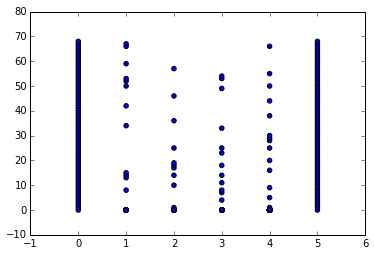

In [189]:
 carre=HighwaySimulator(df)

Defina su red:

    Entradas
    
    Salidas
    
    Topología
    
En base a su diseño de las entradas y salidas diseñe y genere ejemplos para entrenar
Entrene con los datos generados y pruebe con el simulador